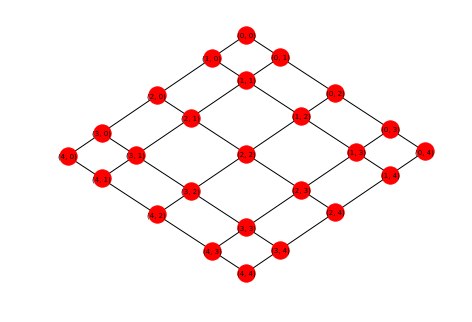

In [3]:
import networkx as nx
import numpy as np
import random


L = 5
G=nx.grid_2d_graph(L,L)
nx.draw(G, with_labels=True, pos=nx.layout.spectral_layout(G), font_size=7)



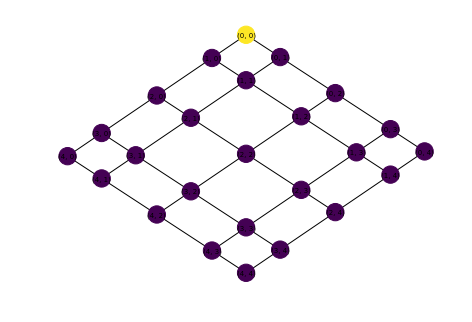

In [4]:

particles = dict( (node, 0) for node in G.nodes()) # dicitonary to store particle locations
particles[(0,0)] = 1 # put a particle at node (0,0)
nx.draw(G, with_labels=True, pos=nx.layout.spectral_layout(G), font_size=7, node_color=[particles[node] for node in G.nodes()])


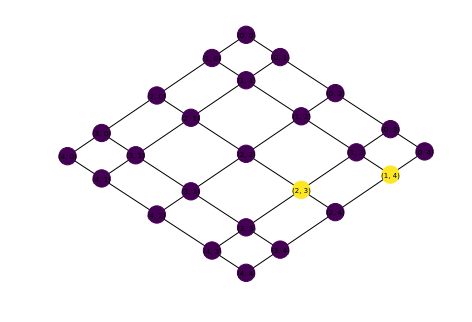

In [5]:
# Remove particle at (0,0) and add two other particles
particles[(0,0)] = 0
particles[(2,3)] = 1
particles[(1,4)] = 1
nx.draw(G, with_labels=True, pos=nx.layout.spectral_layout(G), font_size=7, node_color=[particles[node] for node in G.nodes()])



In [6]:
# select a node randomly and print its neighbors
n = random.choice(G.nodes())
print n
print G.neighbors(n)

(2, 4)
[(2, 3), (3, 4), (1, 4)]


In [7]:
# Do the neighbors of a node have a particle?
def test_neighbors(node):
    if any([1 == particles[node] for node in G.neighbors(node) ]):
        print str(node) + ": has a neighbor with a particle"
        return True
    else:
        print str(node) + ": no particle at neighbors"
        return False
 

test_neighbors( (1,3) )


(1, 4): has a neighbor with a particle


True

In [8]:
test_neighbors( (4,4) )

(4, 3): no particle at neighbors


False

In [9]:
# generate a Bernoulli random variable
print random.choice([0,1])

0


6.207632


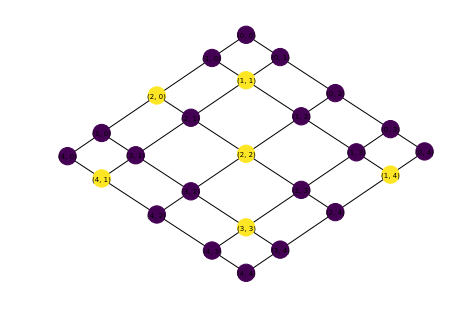

In [10]:
T = 1000000

# Are any neighboring nodes occupied?
def occupied_neighbors(node):
    return any([1 == particles[v] for v in G.neighbors(node)])

# Runs Glauber dynamics on the hardcore configurations of the graph G.
# Returns the average number of particles over all configurations visited.
def glauber_hardcore():
    total = sum(particles.itervalues())
    for _ in xrange(T):
        # Move to the next configuration.
        node = random.choice(G.nodes())
        if not occupied_neighbors(node):
            particles[node] = random.choice([0, 1])
        
        # Update the total number of particles present over all configurations so far.
        total += sum(particles.itervalues())
        
    return float(total) / T

print glauber_hardcore()

# Draw the hardcore configuration obtained at step T.
nx.draw(G, with_labels=True, pos=nx.layout.spectral_layout(G), font_size=7, node_color=[particles[node] for node in G.nodes()])